<font size="8">**Multi-Layer-Perceptron**, implementing a NN from scratch</font>

The basic form of a neural network is one where each neuron of a layer is connected to all of the neurons of the adjacent layer. In the literature there are a number of interchangeable expressions for this network architecture: Fully connected layers, dense networks or Multi-Layer-Perceptrons. Here, we will use "Multi-Layer-Perceptron (MLP)", as this emphasizes the composition of a neural network of thousands of neurons. The logic, how the neurons are interconnected, how the signals are forwarded and how the network parameters (=weights and biases) are adjusted, differentiates the different kinds of artificial neural networks.

# Function of a single neuron

Usually, a neuron receives **multiple inputs**. The inputs are **weighted** and summed up to the **net input**. The net input is processed in the **activation function** which gives the network a **nonlinear behavior**. Today, we use the **logistic function** (sigmoid) for activation, but there are a number of alternatives.

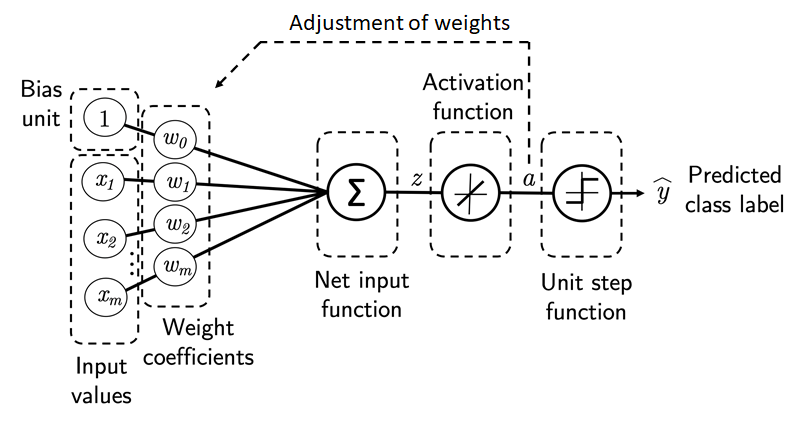


# Introducing the MLP Neural Network structure

The MLP is a network of **densely** connected layers of neurons. 'Densely' means, that each neuron in **layer $l$** is interconnected with each neuron in **layer $l+1$**. In our particular case we implement a neural network with **an input** layer, **one hidden** layer and **an output** layer.

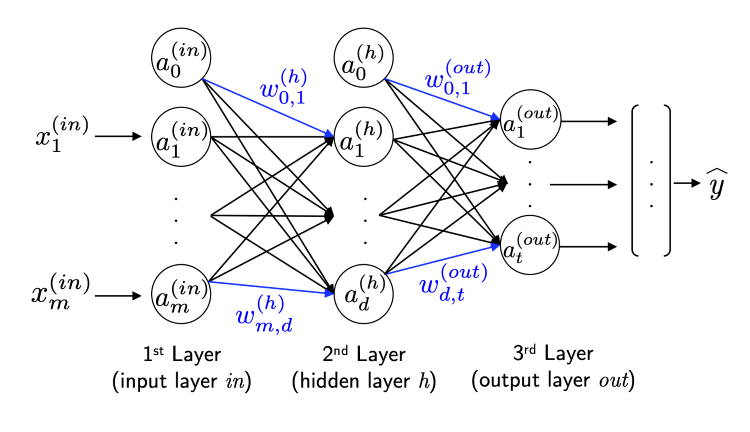

The input values $x^{(in)}$ are transferred to the input layer $a_1^{(in)}$ to $a_m^{(in)}$. Here, we find a **one-to-one relation**: $x_1^{(in)}$ transfers to $a_1^{(in)}$, $x_2^{(in)}$ transfers to $a_2^{(in)}$ and so on. Note, that the input layer and the hidden layer have additonal elements $a_0^{(in)}=1$ and $a_0^{(h)}=1$ that are used for the **bias units**.

$ a^{(in)} =
\begin{bmatrix}
a_0^{(in)} \\
a_1^{(in)} \\
\vdots \\
a_m^{(in)}
\end{bmatrix} = 
\begin{bmatrix}
1 \\
x_1^{(in)} \\
\vdots \\
x_m^{(in)}
\end{bmatrix}$

How important the relation between two particular activation units of adjacent layers is, is stored in the related **weight matrices**: $w_{m,d}^{(h)}$ stores the relations between the **input** layer and the **hidden** layer while $w_{d,t}^{(out)}$ represents the interconnections between **hidden** layer and **output** layer. Let's look at a **3-4-3 MLP** as an example:

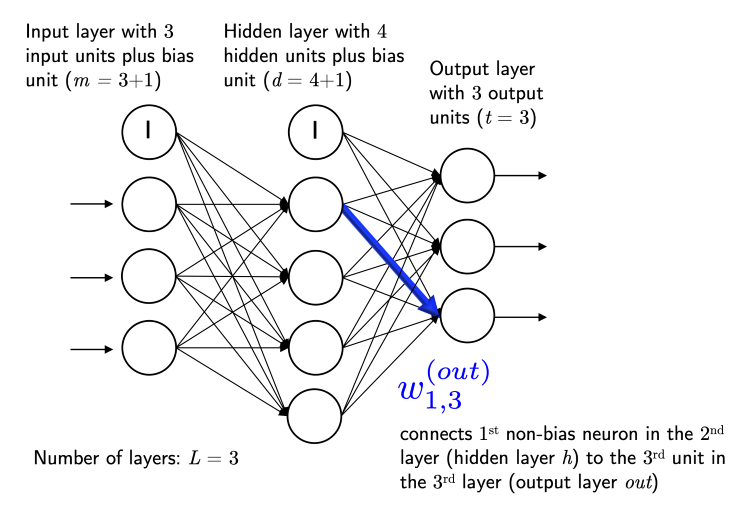

The final output of the network is represented in **one-hot-encoding**: Each possible class label is represented by its own activation unit. In case we have ten different labels (e.g. for ten different digits 0-9) we will have $t=10$ output units in our network.

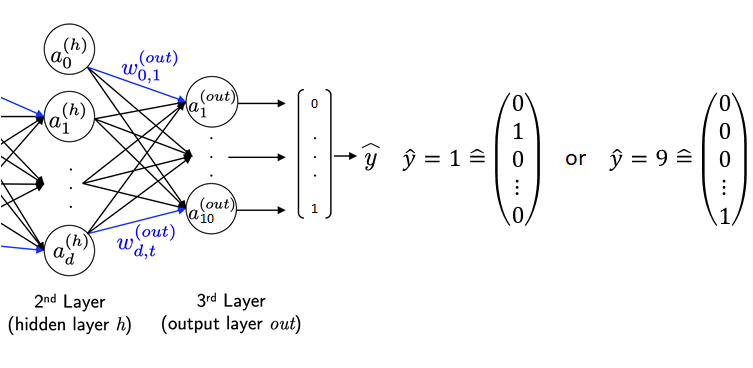

# **Learning** in Neural Networks

Learning in neural networks is a process of mainly three steps:
1. Starting in the input layer, we **forward propagate** the patterns of the training data through the network to gererate an output
2. Based on the network's output, we **calculate the error** with the help of a **cost function**
3. We **backpropagate** the error, find its derivative with respect to each weight, and **update** the model's **weights** and **biases**

We repeat the three steps for multiple epochs until the model reaches a sufficient accuracy. Finally, we **forward propagate** new data through the model to output the **predicted** labels.

## Activating via **forward propagation**

### Step 1: **Net input** of **hidden** layer

Forward propagation denotes the calculation through the network from the input layer to the output layer. For calculating the activation in one particular unit, let's say **$a_1^{(h)}$**, we need to determine its **net input**, $z_1^{(h)}$, first.

$ \displaystyle z_1^{(h)} = a_0^{(in)} w_{0,1}^{(h)} + a_1^{(in)} w_{1,1}^{(h)} + \ldots + a_m^{(in)} w_{m,1}^{(h)}$

Correspondingly we calculate other units in the same layer.

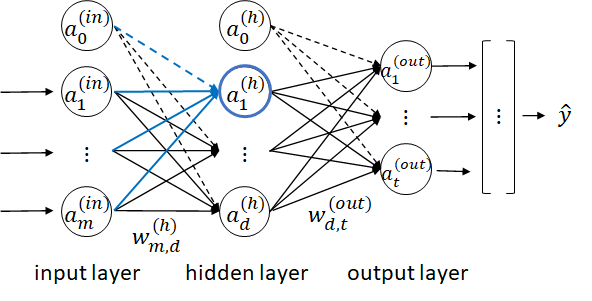

The **dashed lines** are the relations of the **bias units**. Remember that each neuron has an additional bias term $ a_0^{(\cdot)} \cdot w_{0,x}^{(\cdot)} = 1 \cdot \left( - \theta \right)$. For the sake of simplicity, we will ignore this detail at the moment but add it later in our MLP implementation.

Now, we want to determine **all** net inputs $ z_1^{(h)} $ to $ z_d^{(h)} $ in the hidden layer **at once**. We can do this in a **vector-matrix** multiplication.

$ \mathbf{z}^{(h)} = \mathbf{a}^{(in)} \mathbf{W}^{(h)} $

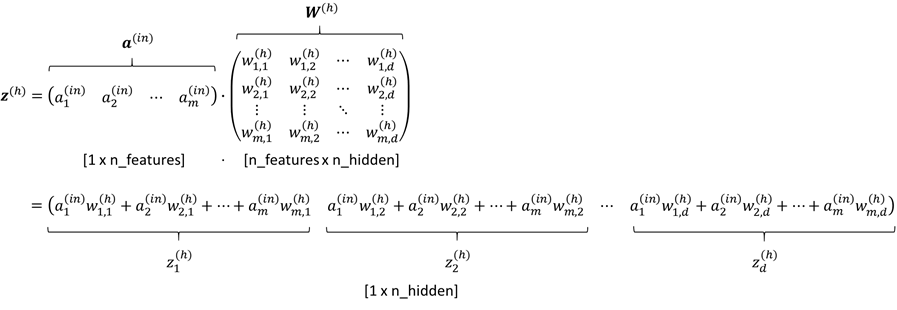

The above vector-matrix multiplication calculates the net input of all units in the hidden layer in one operation, but only for **one sample of our training data**. Obviously we have thousands of samples which are the rows of our training feature matrix $ X_{train}$. Again, we can expand the multiplication, now to a **matrix-matrix** multiplication to calculate **all samples** and **all hidden units** in **one strike**.


$ \mathbf{Z}^{(h)} = \mathbf{A}^{(in)} \mathbf{W}^{(h)} $


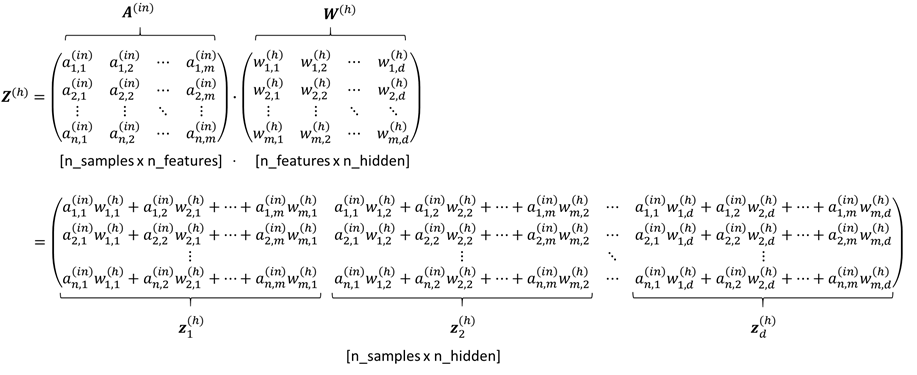

Result of the operation is a matrix that has the samples in the rows and the net inputs of the hidden layer in the columns. Remember, that in the input layer the **activation matrix** equals the **training data**:

$\mathbf{A}^{(in)} = \mathbf{X}_{train}$

### Step 2: **Activation** of **hidden** layer

The activation is straighforward. We put $ Z^{(h)} $ in the activation function, $\phi \left( \cdot \right)$ and calculate **element-wise** the activation:


$ \mathbf{A}^{(h)} = \phi \left( \mathbf{Z}^{(h)} \right) =
\begin{matrix}
\phi \left( z_{1,1}^{(h)} \right) & \phi \left( z_{1,2}^{(h)} \right) & \cdots & \phi \left( z_{1,d}^{(h)} \right) \\
\phi \left( z_{2,1}^{(h)} \right) & \phi \left( z_{2,2}^{(h)} \right) & \cdots & \phi \left( z_{2,d}^{(h)} \right) \\
\vdots & \vdots & \ddots & \vdots \\
\phi \left( z_{n,1}^{(h)} \right) & \phi \left( z_{n,2}^{(h)} \right) & \cdots & \phi \left( z_{n,d}^{(h)} \right)
\end{matrix}
$

For activation we use the **sigmoid function** which we know from **Logistic regression**. **Nonlinear activations** gives our network the ability to learn **nonlinear relations** from the data.

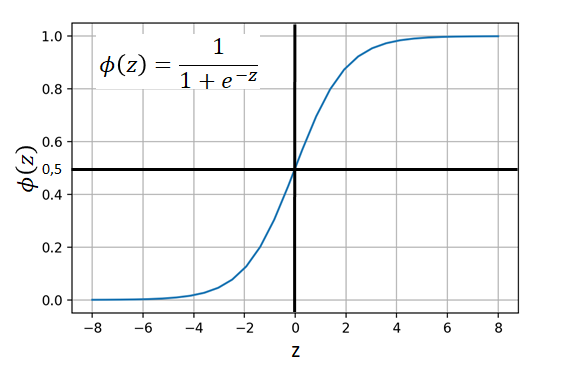

It is important to mention that Python allows us to calculate the element-wise activation for all $n \times d$ net inputs in **one operation**!

### Step 3: **Net input** of **output** layer

We can use the exact same matrix-matrix multiplication to compute the **net input** for the **output** layer.


$ \mathbf{Z}^{(out)} = \mathbf{A}^{(h)} \mathbf{W}^{(out)} $

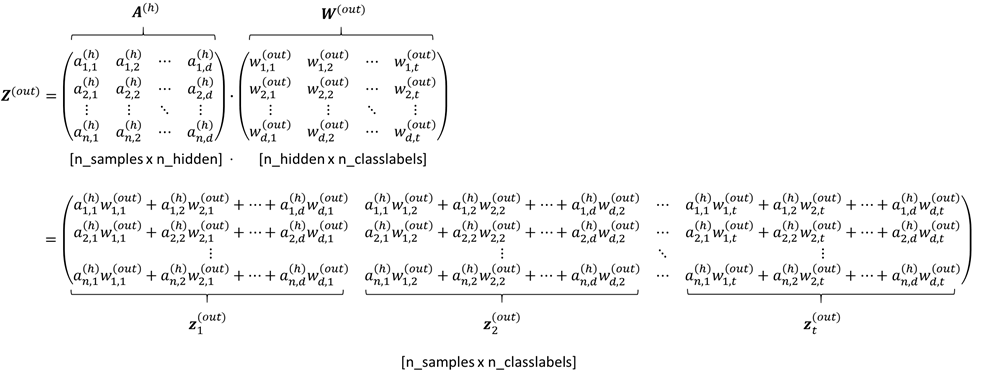

Result of the operation is a matrix that has the samples in the rows and the net inputs of the output layer in the columns. Remember, we have for each possible output, aka for each class label, a particular output unit (one-hot encoding).

### Step 4: **Activation** of **output** layer

The activation of the output layer works in the exact same way as the activation of the hidden layer. Again, we compute the element-wise activation of all $n \times t$ elements of the net input matrix in one operation.


$ \mathbf{A}^{(out)} = \phi \left( \mathbf{Z}^{(out)} \right) =
\begin{pmatrix}
\phi \left( z_{1,1}^{(out)} \right) & \phi \left( z_{1,2}^{(out)} \right) & \cdots & \phi \left( z_{1,t}^{(out)} \right) \\
\phi \left( z_{2,1}^{(out)} \right) & \phi \left( z_{2,2}^{(out)} \right) & \cdots & \phi \left( z_{2,t}^{(out)} \right) \\
\vdots & \vdots & \ddots & \vdots \\
\phi \left( z_{n,1}^{(out)} \right) & \phi \left( z_{n,2}^{(out)} \right) & \cdots & \phi \left( z_{n,t}^{(out)} \right)
\end{pmatrix}
$


### Step 5: **Determine** the predicted **class labels**

The very last step in forward propagation is to decide for each sample, which **label** is finally **predicted**. Since all preparatory work is done, we can read the answer in the **activation matrix**, $ \mathbf{A}^{(out)} $, **or** the **net input matrix**, $ \mathbf{Z}^{(out)} $.

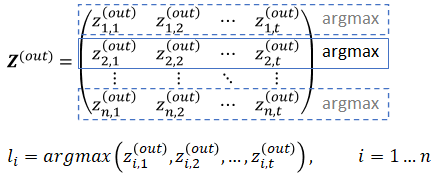

For each sample $i$ (the rows of $ \mathbf{A}^{(out)} $ or $ \mathbf{Z}^{(out)} $) we return the index of the element with the **highest value** as the **predicted label**, $l_i$.

## Error calculation and cost function

### The cost function (Cross-entropy or Log-loss function)

For the activation of our neurons we have chosen the **sigmoid function** $ \phi \left( z \right) = \frac{1}{1+e^{-z}}$ to give our artificial neural net nonlinear capabilities. The sigmoid function squeezes all values from **negative infinity** to **positive infinity** into a **number range** of **$ \{0 \ldots 1 \}$**. Since the true class labels come **one-hot encoded** they are either 0 or 1, too. Therefore, the task of the cost function is to evaluate how close the activation approaches the true class labels.

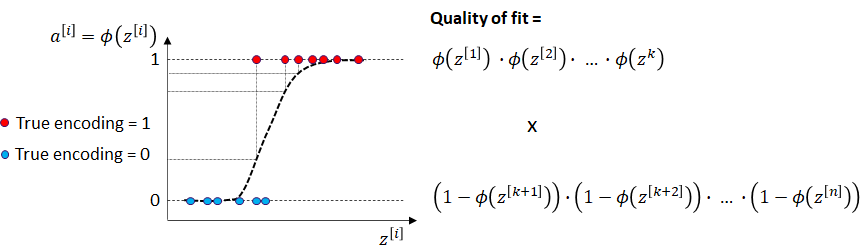

Here, $ z^{[i]} $ is the net input of the *i*th sample in the dataset, which we compute in the forward propagation step. To have a more compact representation let's write $ \phi \left( z^{[i]} \right) $ as $ a^{[i]} $. Further, we can turn the **maximization** problem into a **minimization** problem via multiplication with **$ \left( -1 \right) $**. Since products of small numbers below 1 can easily run into computer **precision** problems we take the **logarithm** of the expression and by that turn the multiplication into a **summation**.

$ \displaystyle J \left( \mathbf{w} \right) = log \big( \left(-1 \right) a^{[1]} a^{[2]} \dots a^{[k]} \cdot \left( 1- a^{[k+1]} \right) \left( 1-a^{[k+2]} \right) \dots \left( 1-a^{[n]} \right) \big)$

$ \displaystyle J \left(\mathbf{w} \right) = - \sum_{i=1}^{n} \underbrace{y^{[i]} log \left( a^{[i]} \right)}_{y^{[i]}=1} + \underbrace{\left( 1-y^{[i]} \right) log \left( 1-a^{[i]} \right)}_{y^{[i]}=0} \; \; \; | \; \; \; a^{[i]} = \phi \left( z^{[i]} \right) = \frac{1}{1+e^{-z^{[i]}}} $

Remember, that $ \left[ i \right] $ is the index of the sample, not the layer!

The above cost function adds up the deviations from the true classes $y^{[i]}=0$ or $y^{[i]}=1$ over **all samples** of the dataset. But it does not yet fully include that we output the networks prediction in **one-hot encoding**. Since we have $t$ elements in our **output layer** a prediction result of "class 2" might look like the following example:

$ a^{(out)} =
\begin{bmatrix}
0.1 \\
0.9 \\
\vdots \\
0.3
\end{bmatrix}, \quad \quad
y = 
\begin{bmatrix}
0 \\
1 \\
\vdots \\
0
\end{bmatrix}$

Thus we need to generalize the logistic cost function to all *t* activation units in our network.


$ \displaystyle J \left(\mathbf{W} \right) = - \sum_{i=1}^{n} \sum_{j=1}^{t} y_j^{[i]} log \left( a_j^{[i]} \right) + \left( 1-y_j^{[i]} \right) log \left( 1-a_j^{[i]} \right) $


With this expansion we sum the costs over **all output units** and over **all samples** of the training dataset

### Regularization

**Overfitting** is the circumstance of adapting the model too closely to the **training data**. An overfitted model reproduces the training data almost perfectly but **fails to generalize** and therefore poorly predicts on new data. Overfitting often goes hand in hand with high model complexity, that is why regularization **penalizes the weights** in order to tune the model's complexity.

One frequently used regularization method is the **L2 regularization**. It adds the **sum of squared weights** to the model's cost function:

$ \displaystyle L2: \quad \frac{\lambda}{2} \| \mathbf{w} \|_2^2 = \frac{\lambda}{2} \sum_{j=1}^{m} w_j^2 $

Here, $ \lambda $ is the **regularization parameter**.

The L2 regularization adds additional costs to the cost minimization and shifts the overall cost optimum to lower values of $ \mathbf{w} $.

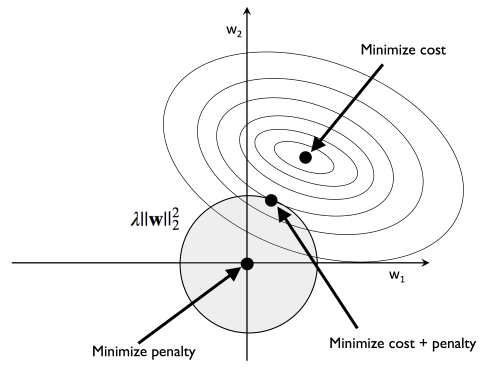

In the case of our **artificial neural network** the L2 regularization takes the weights between all layers into account. If $ l $ denotes a particular layer and $ u_l $ denotes the units in this layer we can summarize the L2 regularization as follows.

$ \displaystyle L2: \quad \frac{\lambda}{2} \| \mathbf{w} \|_2^2 = \frac{\lambda}{2} \sum_{l=1}^{L-1} \sum_{i=1}^{u_l} \sum_{j=1}^{u_{l+1}} \left( w_{i,j}^{(l)} \right)^2 $

### The regularized cost function

Adding the regularization term to the logistic cost function brings us to the final cost function of our ANN:


$ \displaystyle J \left(\mathbf{W} \right) = - \left[ \sum_{i=1}^{n} \sum_{j=1}^{t} y_j^{[i]} log \left( a_j^{[i]} \right) + \left( 1-y_j^{[i]} \right) log \left( 1-a_j^{[i]} \right) \right] + \frac{\lambda}{2} \sum_{l=1}^{L-1} \sum_{i=1}^{u_l} \sum_{j=1}^{u_{l+1}} \left( w_{i,j}^{(l)} \right)^2$


## Adjust the weights through **backpropagation**

The main step in fitting a neural network to the training data is **updating the weights**. We compare the net's prediction to the true class labels, derive the **error vector** and **back**propagate from the **output** layer via the **hidden** layer to the **input** layer (from "right to left") and update the weights stepwise in the desired direction.

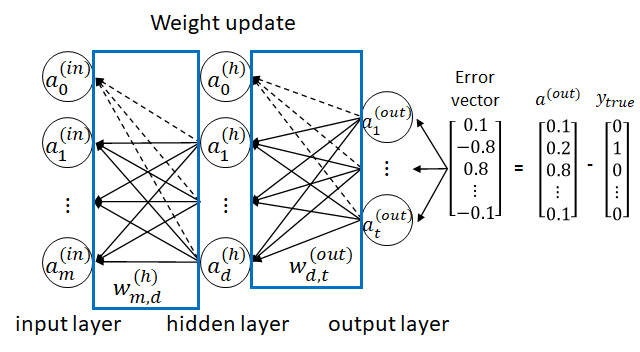

### Updating the **Output Weights** $ W_{d,t}^{(out)}$

We already know from the **Gradient Descent optimized** ML techniques, how to update the weights. The main idea is to take a step in the **opposite direction of the gradient** of the cost function $ \nabla J \left( \mathbf{W}^{(out)} \right) $.


$ \mathbf{W}^{(out)} = \mathbf{W}^{(out)} + \Delta \mathbf{W}^{(out)} \quad $ with

$ \Delta \mathbf{W}^{(out)} = - \eta \nabla J \left( \mathbf{W}^{(out)} \right) $


To compute the gradient of the cost function, we need to determine the **partial derivative** of the cost function with respect to the weights, $ \mathbf{W}^{(out)} $. Since $ \mathbf{W}^{(out)} $ is nested deeply in the equations we need to use the **chain rule** to come to the desired results.

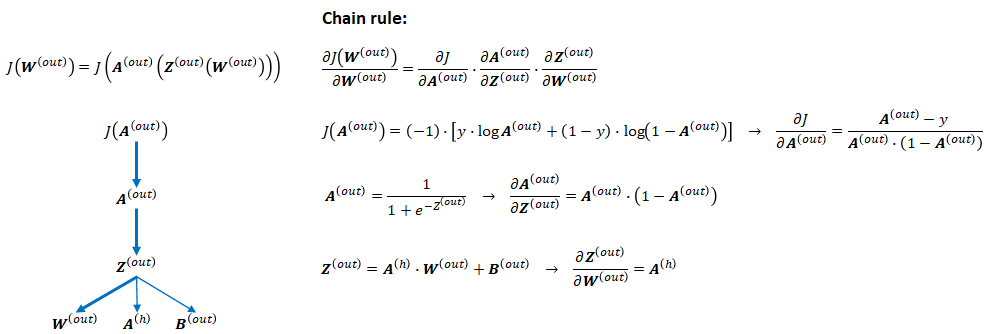

If we compose the terms according to the chain rule we receive:

$ \displaystyle \nabla J \left( \mathbf{W}^{(out)} \right) = \frac{\mathbf{A}^{(out)}-y}{\mathbf{A}^{(out)} \cdot \left( 1- \mathbf{A}^{(out)} \right)} \cdot \mathbf{A}^{(out)} \cdot \left( 1-\mathbf{A}^{(out)} \right) \cdot \mathbf{A}^{(h)} $

$ \displaystyle \nabla J \left( \mathbf{W}^{(out)} \right) = \mathbf{A}^{(h)} \cdot \left( \mathbf{A}^{(out)} -y \right) $

So far, we ignored the regularization term in $ J \left( \mathbf{W} \right) $. But the derivative is simple to add:

$ \displaystyle \frac{\partial}{\partial \mathbf{W}^{(out)}} \left( \frac{\lambda}{2} \cdot \left( \mathbf{W}^{(out)} \right)^2 \right) = \lambda \cdot \mathbf{W}^{(out)} $

Combining the derivatives of logistic cost function and regularization term brings us the **final partial derivative**.

$ \displaystyle \nabla J \left( \mathbf{W}^{(out)} \right) = \mathbf{A}^{(h)} \cdot \underbrace{\left( \mathbf{A}^{(out)} -y \right)}_{\mathrm{delta_out}} + \lambda \cdot \mathbf{W}^{(out)} $



### Updating the **Hidden Weights** $ W_{m,d}^{(h)}$

The update rule for the **hidden weights $ W_{m,d}^{(h)}$** is very similar to the update of the output weights. The only difference is that we need to go two levels **deeper** into the **nested derivatives** (chain rule) due to the bigger distance between the output layer and the hidden weights. Again, we start with the main idea to take a step in the **opposite direction of the gradient** of the cost function $ \nabla J \left( \mathbf{W}^{(h)} \right) $.


$ \mathbf{W}^{(h)} = \mathbf{W}^{(h)} + \Delta \mathbf{W}^{(h)} \quad $ with

$ \Delta \mathbf{W}^{(h)} = - \eta \nabla J \left( \mathbf{W}^{(h)} \right) $


Now, we need the partial derivative of the cost function $J$ with respect to the hidden weights, $ \mathbf{W}^{(h)} $.

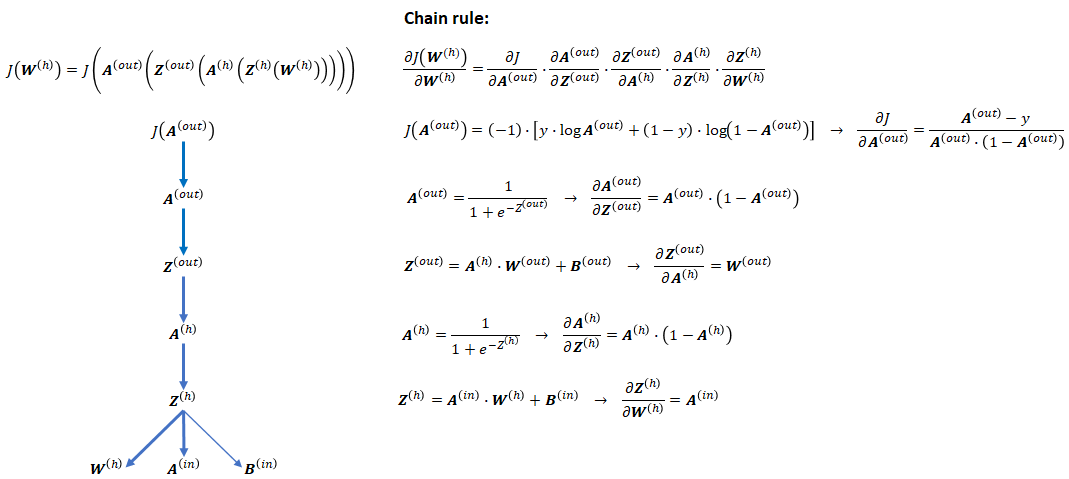

According to the chain rule, the requested derivative is the product of the single partitions.

$ \displaystyle \nabla J \left( \mathbf{W}^{(h)} \right) = \frac{\mathbf{A}^{(out)} - y}{\mathbf{A}^{(out)} \cdot \left( 1- \mathbf{A}^{(out)} \right)} \cdot \mathbf{A}^{(out)} \cdot \left( 1- \mathbf{A}^{(out)} \right) \cdot \mathbf{W}^{(out)} \cdot \mathbf{A}^{(h)} \cdot \left( 1- \mathbf{A}^{(h)} \right) \cdot \mathbf{A}^{(in)} $

$ \displaystyle \nabla J \left( \mathbf{W}^{(h)} \right) = \left( \mathbf{A}^{(out)} - y \right) \cdot \mathbf{W}^{(out)} \cdot \mathbf{A}^{(h)} \cdot \left( 1- \mathbf{A}^{(h)} \right) \cdot \mathbf{A}^{(in)} $

Again, we ignored the regularization term in $ J \left( \mathbf{W} \right) $ which we need to add:

$ \displaystyle \frac{\partial}{\partial \mathbf{W}^{(h)}} \left( \frac{\lambda}{2} \cdot \left( \mathbf{W}^{(h)} \right)^2 \right) = \lambda \cdot \mathbf{W}^{(h)} $

Which brings us to the final derivative:

 
$ \displaystyle \nabla J \left( \mathbf{W}^{(h)} \right) = \underbrace{\left( \mathbf{A}^{(out)} - y \right)}_{\mathrm{delta_out}} \cdot \mathbf{W}^{(out)} \cdot \mathbf{A}^{(h)} \cdot \left( 1- \mathbf{A}^{(h)} \right) \cdot \mathbf{A}^{(in)} + \lambda \cdot \mathbf{W}^{(h)} $

# Implementing the **Multi Layer Perceptron** (MLP) from scratch

In [2]:
import numpy as np
import sys


class NeuralNetMLP_fs:
    """
    Multi-layer perceptron classifier

    Parameters
    ==========
    n_hidden : int (default: 30)
        Number of hidden units
    l2 : float (default: 0.)
        Lambda value for L2-regularization
        No regularization if l2=0
    epochs : int (default: 100)
        Number of passes over the training set
    eta : float (default: 0.001)
        Learning rate
    shuffle : bool (default: True)
        If True, shuffles training data every epoch to prevent circles
    minibatch_size : int (default: 1)
        Number of training examples per minibatch
    seed : int (default: None)
        Random seed for initializing weights and shuffling

    Attributes
    ==========
    eval_ : dict
      Dictionary collecting the cost, training accuracy
      and validation accuracy for each epoch during training

    Methods
    =======
    _onehot:
        Encodes labels into one-hot representation
    _sigmoid:
        Computes logistic function (sigmoid)
    _forward:
        Computes forward propagation
    _compute_cost:
        Computes the regularized logistic cost function
    predict:
        Predicts class labels for new data
    fit:
        Fits model parameters (weights) to training data
    """

    def __init__(self, n_hidden=30, l2=0., epochs=100, eta=0.001,
                 shuffle=True, minibatch_size=1, seed=None):
        self.random = np.random.RandomState(seed)
        self.n_hidden = n_hidden
        self.l2 = l2
        self.epochs = epochs
        self.eta = eta
        self.shuffle = shuffle
        self.minibatch_size = minibatch_size

    def _onehot(self, y, n_classes):
        """
        Encodes labels into one-hot representation

        Parameters
        ==========
        y : {array}, shape = [n_samples]
            Label vector
        n_classes : int
            Number of classes
            (unique labels in dataset)

        Returns
        =======
        onehot : {array}, shape = [n_samples, n_classes]
            Label matrix y in one-hot representation
        """
        # Initialize matrix with zeros of shape = [n_samples, n_classes]
        onehot = np.zeros((y.shape[0], n_classes))
        # Iterate over label vector y
        for idx, val in enumerate(y.astype(int)):
            onehot[idx, val] = 1.
        # Return matrix
        return onehot

    def _sigmoid(self, Z):
        """
        Computes logistic function (sigmoid)

        Parameters
        ==========
        Z : float or {array}
            Value(s) to be transformed

        Returns
        =======
        _ : float or {array}
            Sigmoid activation value of Z
        """
        return 1. / (1. + np.exp(-np.clip(Z, -250, 250)))

    def _forward(self, X):
        """
        Computes forward propagation from input to activation of output layer

        Parameters
        ==========
        X : {array}, shape = [n_samples, n_features]
            Feature matrix of training data

        Returns
        =======
        Z_h : {array}, shape = [n_samples, n_hidden]
            Net inputs of hidden layer
        A_h : {array}, shape = [n_samples, n_hidden]
            Activation of hidden layer
        Z_out : {array}, shape = [n_samples, n_classlabels]
            Net input of output layer
        A_out : {array}, shape = [n_samples, n_classlabels]
            Activation of output layer
        """
        # Step 1: Net input of hidden layer
        #          Z(h)          =            A(in)         dot          W(h)
        # [n_samples x n_hidden] = [n_samples x n_features] dot [n_features x n_hidden]
        Z_h = np.dot(X, self.W_h) + self.B_h

        # Step 2: Activation of hidden layer
        # A(h) = phi(Z(h))
        A_h = self._sigmoid(Z_h)

        # Step 3: Net input of output layer
        #           Z(out)            =           A(h)         dot          W(out)
        # [n_samples x n_classlabels] = [n_samples x n_hidden] dot [n_hidden x n_classlabels]

        Z_out = np.dot(A_h, self.W_out) + self.B_out

        # Step 4: Activation of output layer
        # A(out) = phi(Z(out))
        A_out = self._sigmoid(Z_out)

        return Z_h, A_h, Z_out, A_out

    def _compute_cost(self, y_enc, output):
        """
        Computes the regularized logistic cost function

        Parameters
        ==========
        y_enc : {array}, shape = [n_samples, n_classlabels]
            One-hot encoded representation of TRUE class labels
        output : {array}, shape = [n_samples, n_classlabels]
            Activation of the output layer (forward propagation)

        Returns
        =======
        cost : float
            Regularized cost
        """
        # Regularization term
        L2_term = (self.l2 *
                   (np.sum(self.W_h ** 2.) +
                    np.sum(self.W_out ** 2.)))

        # Part 1 of logistic cost function
        term1 = -y_enc * (np.log(output))
        # Part 2 of logistic cost function
        term2 = (1. - y_enc) * np.log(1. - output)
        # Total
        cost = np.sum(term1 - term2) + L2_term
        # Return costs
        return cost

    def predict(self, X):
        """
        Predicts class labels for new data

        Parameters
        ==========
        X : {array}, shape = [n_samples, n_features]
            Feature matrix for unknown data

        Returns
        =======
        y_pred : {array}, shape = [n_samples]
            Predicted class labels
        """
        # Receive values from forward propagation
        Z_h, A_h, Z_out, A_out = self._forward(X)
        # Predict output class with highest value
        # (A_out alternatively)
        y_pred = np.argmax(Z_out, axis=1)
        return y_pred

    def fit(self, X_train, y_train, X_valid, y_valid):
        """
        Fits model parameters (weights) to training data

        Parameters
        ==========
        X_train : {array}, shape = [n_samples, n_features]
            Feature matrix of training data
        y_train : {array}, shape = [n_samples]
           Label vector of training data
        X_valid : {array}, shape = [n_samples, n_features]
            Feature matrix of validation data
        y_valid : {array}, shape = [n_samples]
            Label vector of validation data

        Returns
        =======
        None
        """
        # Get number of unique class labels
        n_classlabels = np.unique(y_train).shape[0]
        # Get number of features
        n_features = X_train.shape[1]

        ########################
        # Weight initialization
        ########################

        # Weights W_h for input -> hidden
        self.B_h = np.zeros(self.n_hidden)
        self.W_h = self.random.normal(loc=0.0, scale=0.1,
                                      size=(n_features, self.n_hidden))

        # Weights W_out for hidden -> output
        self.B_out = np.zeros(n_classlabels)
        self.W_out = self.random.normal(loc=0.0, scale=0.1,
                                        size=(self.n_hidden, n_classlabels))

        # Length of string for formatting
        epoch_strlen = len(str(self.epochs))
        # Dictionary for documentation
        self.eval_ = {'cost': [], 'train_acc': [], 'valid_acc': []}

        # One-hot encode training labels
        y_train_enc = self._onehot(y_train, n_classlabels)

        # Iterate over training epochs
        for i in range(self.epochs):

            # Iterate over minibatches
            indices = np.arange(X_train.shape[0])
            print(indices)

            if self.shuffle:
                self.random.shuffle(indices)

            for start_idx in range(0, indices.shape[0] - self.minibatch_size +
                                   1, self.minibatch_size):
                batch_idx = indices[start_idx:start_idx + self.minibatch_size]

                # Forward propagation
                Z_h, A_h, Z_out, A_out = self._forward(X_train[batch_idx])

                ##################
                # Backpropagation
                ##################

                ###################
                # Update of W_out
                # [n_samples, n_classlabels]
                delta_out = A_out - y_train_enc[batch_idx]

                # [n_hidden x n_classlabels] = [n_hidden X n_samples] dot [n_samples x n_classlabels]
                nabla_W_out_1 = np.dot(A_h.T, delta_out)
                # [n_hidden x n_classlabels]
                nabla_W_out_2 = self.l2 * self.W_out
                # [n_classlabels] = sum[n_samples x n_classlabels, axis=0]
                nabla_B_out = np.sum(delta_out, axis=0)

                # [n_hidden x n_classlabels]
                delta_W_out = (-1.) * self.eta * (nabla_W_out_1 + nabla_W_out_2)
                # [n_classlabels]
                delta_B_out = (-1.) * self.eta * nabla_B_out

                # [n_hidden x n_classlabels]
                self.W_out += delta_W_out
                # [n_classlabels]
                self.B_out += delta_B_out

                #################
                # Update of W_h

                # [n_samples x n_hidden] = [n_samples x n_classlabels] dot [n_classlabels x n_hidden]
                nabla_W_h_1 = (np.dot(delta_out, self.W_out.T)) * (A_h * (1. - A_h))
                # [n_features x n_hidden] = [n_features x n_samples] dot [n_samples x n_hidden]
                nabla_W_h_2 = np.dot(X_train[batch_idx].T, nabla_W_h_1)
                # [n_features x n_hidden]
                nabla_W_h_3 = self.l2 * self.W_h
                # [n_hidden] = sum[n_samples x n_hidden, axis=0]
                nabla_B_h = np.sum(nabla_W_h_1, axis=0)

                # [n_features x n_hidden]
                delta_W_h = (-1.) * self.eta * (nabla_W_h_2 + nabla_W_h_3)
                # [n_hidden]
                delta_B_h = (-1.) * self.eta * nabla_B_h

                # [n_features x n_hidden]
                self.W_h += delta_W_h
                # [n_hidden]
                self.B_h += delta_B_h

            #############
            # Evaluation
            #############

            # Evaluation after each epoch during training
            Z_h, A_h, Z_out, A_out = self._forward(X_train)
            # Determine costs with updated weights
            cost = self._compute_cost(y_enc=y_train_enc,
                                      output=A_out)
            # Determine training and validation accuracy after each epoch
            y_train_pred = self.predict(X_train)
            y_valid_pred = self.predict(X_valid)
            train_acc = ((np.sum(y_train == y_train_pred)).astype(np.float64) /
                         X_train.shape[0])
            valid_acc = ((np.sum(y_valid == y_valid_pred)).astype(np.float64) /
                         X_valid.shape[0])
            # Print basic information after each epoch
            sys.stderr.write('\r%0*d/%d | Cost: %.2f '
                             '| Train/Valid Acc.: %.2f%%/%.2f%% ' %
                             (epoch_strlen, i+1, self.epochs, cost,
                              train_acc*100, valid_acc*100))
            sys.stderr.flush()
            # Store costs and accuracies in dictionary
            self.eval_['cost'].append(cost)
            self.eval_['train_acc'].append(train_acc)
            self.eval_['valid_acc'].append(valid_acc)

# **Apply** NeuralNetMLP_fs for **image recognition**

Let's see our neural net in action! We want to teach it to recognize **hand-written** digits.

## Load data

In order to safe time we preprocessed the images and safed the data as a numpy repository.

### Load data from numpy zip file

In [2]:
import numpy as np

# Data is stored in numpy zip file (.npz)
mnist = np.load('mnist_scaled.npz')
mnist.files

['X_train', 'y_train', 'X_test', 'y_test']

### Unpack data, split into arrays and check dimensions

In [3]:
# Unpack data into train and test variables
X_train, y_train, X_test, y_test = [mnist[f] for f in ['X_train', 'y_train', 
                                    'X_test', 'y_test']]

# Clear memory
del mnist

# Check dimensions
print(f"Shape X_train: {X_train.shape}")
print(f"Shape y_train: {y_train.shape}")
print(f"Shape X_test: {X_test.shape}")
print(f"Shape y_test: {y_test.shape}")

Shape X_train: (60000, 784)
Shape y_train: (60000,)
Shape X_test: (10000, 784)
Shape y_test: (10000,)


## Familiarize with the data

### Check examplary X and y values

In [4]:
# Print shape of first row of X_train
print(f"\nShape of first row of X_train: {X_train[0].shape}, \
obviously all values in one line")
print("This are the grey scale values of the pictures with 28x28 resolution!\n\n")

# Print 100 values of first row of X_train
print(f"Grey scale values:\n{X_train[0][100:200]}\n\n")

# Print first row of y
print(f"First row of y: {y_train[0]}")
print("This is the TRUE value of the hand written picture.")


Shape of first row of X_train: (784,), obviously all values in one line
This are the grey scale values of the pictures with 28x28 resolution!


Grey scale values:
[-1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -0.97647059 -0.85882353
 -0.85882353 -0.85882353 -0.01176471  0.06666667  0.37254902 -0.79607843
  0.30196078  1.          0.9372549  -0.00392157 -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.

### Plot the first picture

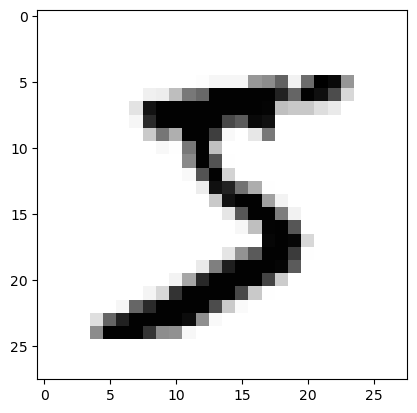

In [5]:
import matplotlib.pyplot as plt

# Plot the picture of first row
plt.imshow(X_train[0].reshape(28, 28), cmap='Greys')
plt.show()

### Plot examples of each digit

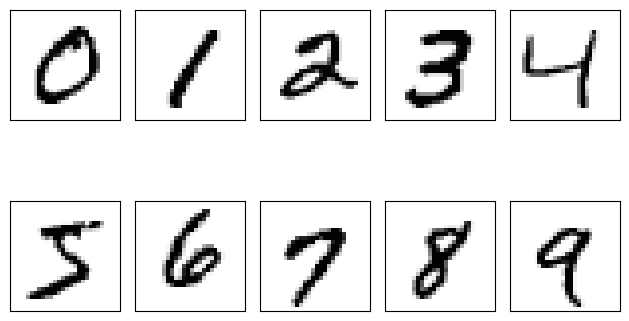

In [6]:
# Print the first examples for all 10 digits

# Arrange plots in 2 rows and 5 columns
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()

# Run through digits 0 to 9
for i in range(10):
    img = X_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

# Arrange plots (ticks,layout)
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

### Show variety of handwritings

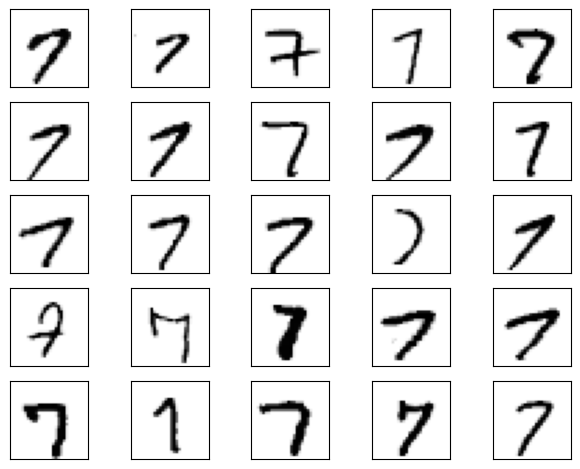

In [7]:
# Arrange plots in 5 rows and 5 columns
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()

# Run through the first 25 examples of "7"
for i in range(25):
    img = X_train[y_train == 7][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

# Arrange plots (ticks,layout)
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

## **Run** NeuralNetMLP_fs

### Instanciate object and fit model

In [1]:
# Instanciate class NeuralNetMLP_fs
nn = NeuralNetMLP_fs(n_hidden=100,
                     l2=0.03,
                     epochs=100,
                     eta=0.0005,
                     minibatch_size=300,
                     shuffle=True,
                     seed=1)

# Fit the model
nn.fit(X_train=X_train[:55000],
       y_train=y_train[:55000],
       X_valid=X_train[55000:],
       y_valid=y_train[55000:])

NameError: name 'NeuralNetMLP_fs' is not defined

### Plot degression of costs over epochs

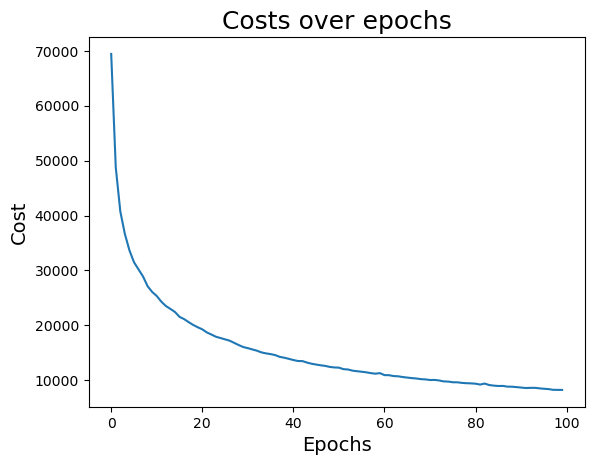

In [9]:
import matplotlib.pyplot as plt

plt.plot(range(nn.epochs), nn.eval_['cost'])
plt.ylabel('Cost', fontsize=14)
plt.xlabel('Epochs', fontsize=14)
plt.title('Costs over epochs', fontsize=18)
plt.show()

### Plot training and validation accuracy

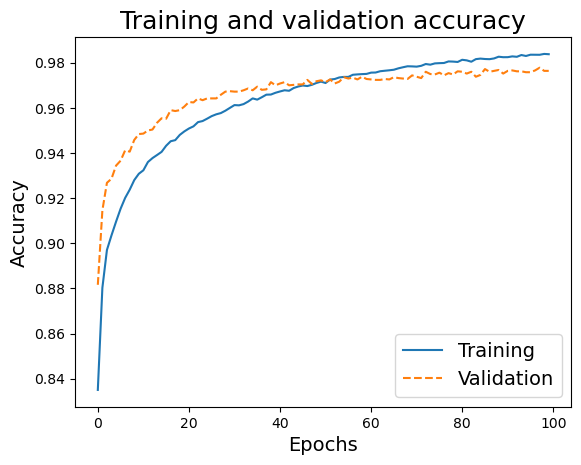

In [10]:
# Plot training accuracy
plt.plot(range(nn.epochs), nn.eval_['train_acc'], 
         label='Training')

# Plot validation accuracy
plt.plot(range(nn.epochs), nn.eval_['valid_acc'], 
         label='Validation', linestyle='--')

# Set up canvas
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Epochs', fontsize=14)
plt.title('Training and validation accuracy', fontsize=18)
plt.legend(loc='lower right', fontsize=14)
plt.show()

### Evaluate **accuracy** with **unknown** data (10k samples)

In [11]:
# Predict labels fo X_test
y_test_pred = nn.predict(X_test)

# Calculate accuracy
acc = (np.sum(y_test == y_test_pred).astype(np.float64)
       / X_test.shape[0])

# Print result
print(f'Test accuracy: {acc * 100:0.2f}%')

Test accuracy: 97.14%


### Inspect **misclassified** examples

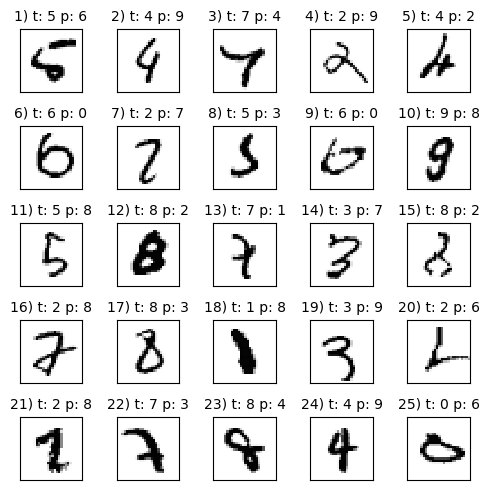

In [12]:
# Filter misclassified examples and select first 25
miscl_img = X_test[y_test != y_test_pred][:25]
correct_lab = y_test[y_test != y_test_pred][:25]
miscl_lab = y_test_pred[y_test != y_test_pred][:25]

# Arrange plot in 5 rows and 5 columns
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True, figsize=(5,5))
ax = ax.flatten()
# Plot misclassified pictures in loop
for i in range(25):
    img = miscl_img[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title('%d) t: %d p: %d' %(i+1, correct_lab[i], miscl_lab[i]),fontsize=10)

# Arrange canvas
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()